In [43]:
!pip install jupyterthemes

In [44]:
!jt -l oceans16

usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]
jt: error: unrecognized arguments: oceans16


Elaine Swanson <br>
BOT 401 Spring 2021 <br>
Advisors: Dr. Bisson and Dr. Westberry <br>
Ocean Color Group Oregon State University <br>
***

# Comparison of MODIS, CALIOP, ARGO sensors for the Particulate Backscattering Coefficient in the Southern Ocean
***
## References
<br>
[Bisson et al. 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020GL090909)<br>
[Lacour 2020](https://pubmed.ncbi.nlm.nih.gov/32906961/)<br>
[Lee et al. 2002](https://www.osapublishing.org/ao/abstract.cfm?uri=ao-41-27-5755)<br>
<br>
## Main objectives<br>
Comparing different sensors on the basis of the backscattering coefficient ($b_b_p$ per meter). These sensors include [MODIS](https://terra.nasa.gov/about/terra-instruments/modis) (Moderate Resolution Imaging Spectroradiometer-- ocean color-- launched ~2002), [CALIOP](https://www-calipso.larc.nasa.gov/)(Cloud-Aerosal Lidar with Orthogonal Polarization-- lidar), and [ARGO](https://argo.ucsd.edu/about/history-of-argo/)(Array for Real-time Geostrophic Oceanography-- floats about 1 foot in diameter).<br> 
In the global oceans, the particulate backscatter coefficient ($b_b_p$ per meter) exhibits the strongest relationship when approximating phytoplankton carbon (PhytoC $mg/m^3$). Backscattering off particles vs. backscattering off of dissolved materials. None of these sensors measure $b_b_p$ or PhytoC directly. The linear relationship between these two variables is significant because $b_b_p$ is a measurement we can derive from the said three sensors (Graff et al, 2015). Using these measurements, PhytoC estimates can be illustrated to show the ecological and biogeochemical status of phytoplankton biomass and physiology in the global oceans. All sensors and data from sensors have been useful to the scientific community. MODIS has been historically used. Much of the reports has historically been from MODIS data. The current papers (above) are biased towards CALIOP and ARGO. <br>

History of measurements. Once only had shipboard measurements. Specifically for the Southern Ocean (S.O.) (approximately below latitude 40° South) the monitoring of phytoplankton biomass can be analyzed with CALIOP and ARGO data (which can retrieve data over the whole year). These sensors provide greater coverage of data over the seasonal cycle. Lidar alleviates a lot of the problems with ocean color data: seasonality, cloud cover, etc. Monitoring comes from MODIS observations as well. Satelittes provided ocean color data which was exclusivly used for decades. As time went on, the limitations of ocean color data have been realized. There is a seasonal bias in ocean color that might be impacting the S.O. Ocean color coverage data from satellites is poor because of cloud coverage over the S.O. The logistics of doing physical research there is harsh. There is also a large seasonal bias in ocean color using lidar and floats. This discrepancy can be illutstrated by depicting lidar phytoplankton carbon $PhytoC_l$ and ocean color phytoplankton carbon $PhytoC_(oc)$. Doing this comparison will give me exposure to working with lidar, ocean color, and float data, inverting remote sensing reflectance via a set of different mathematical functions, and experience working with the Python language and Jupyter notebook. Overall, this project is intended to be an introduction to applied mathematical biology focusing on ocean health. By completing these tasks, there are conclusions I can come to about the ecological status of the Southern Ocean gyre because the properties that I am trying to reconcile are directly related to biogeochemical quantities. 
<br>
Data comparison over the backscattering spectrum. Building up per week on the detail and size of data sets. First, we had data from just one ARGO float. Then, around 20 ARGO floats with CALIOP and MODIS. Why do we want to compare everything at the same wave length? How do we adjust the backscattering slope? With no normalization applied to this data, we have:
<br>
MODIS at 531 $nm$<br>
CALIOP at 532 $nm$<br>
ARGO at 700 $nm$<br>
There is a power law function that describes the spectral shape. A power law is a functional relationship between two quantities. Where relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities. **One quantity varies as a power of another**. <br>
Spatiotemporal 


## Data Visualization of one ARGO float. float_SO.csv 


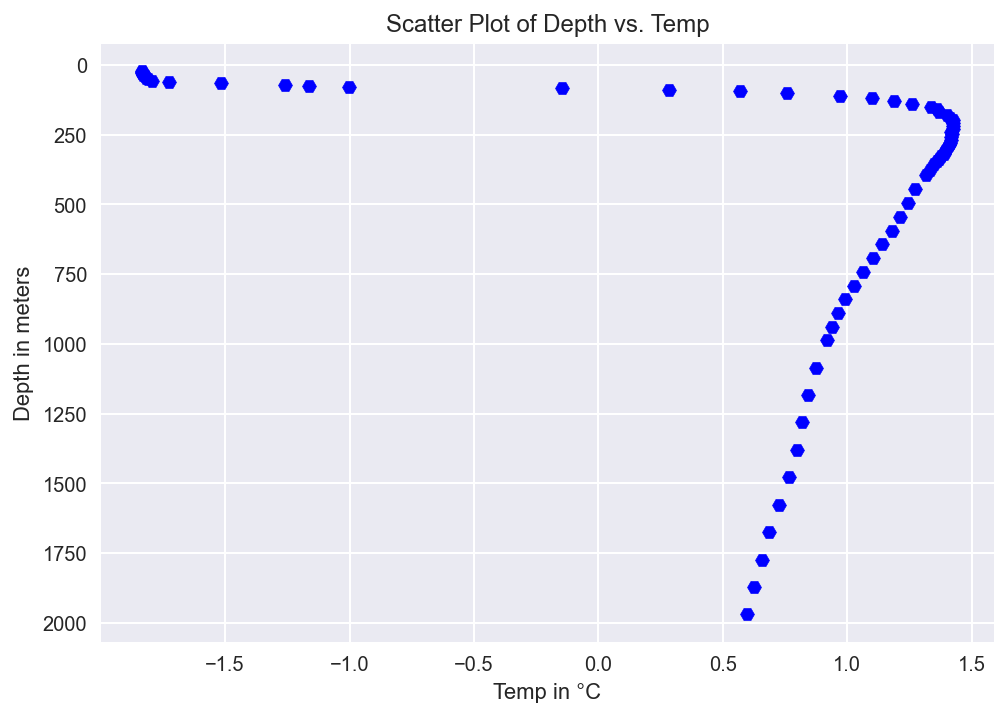

In [60]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
plt.scatter(DF.Temp, DF.Depth, c='b',marker='H')
plt.xlabel("Temp in °C")
plt.ylabel('Depth in meters')
plt.title('Scatter Plot of Depth vs. Temp')
plt.gca().invert_yaxis()
plt.show()

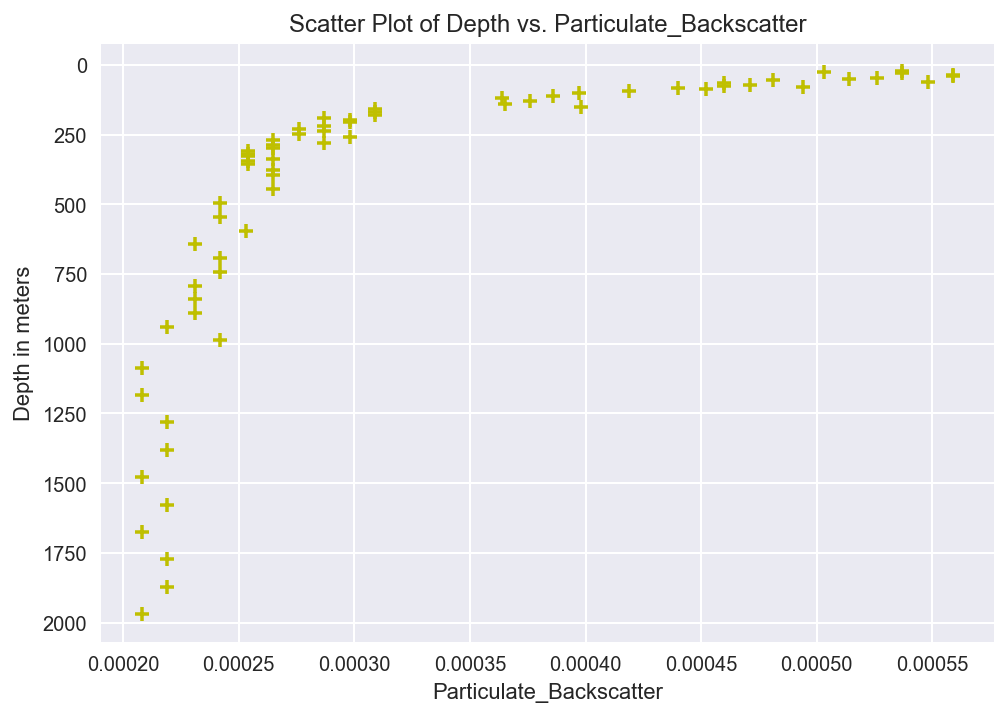

In [57]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
plt.scatter(DF.Particulate_Backscatter, DF.Depth, c='y',marker='+')
plt.xlabel("Particulate_Backscatter")
plt.ylabel('Depth in meters')
plt.title('Scatter Plot of Depth vs. Particulate_Backscatter')
plt.gca().invert_yaxis()
plt.show()

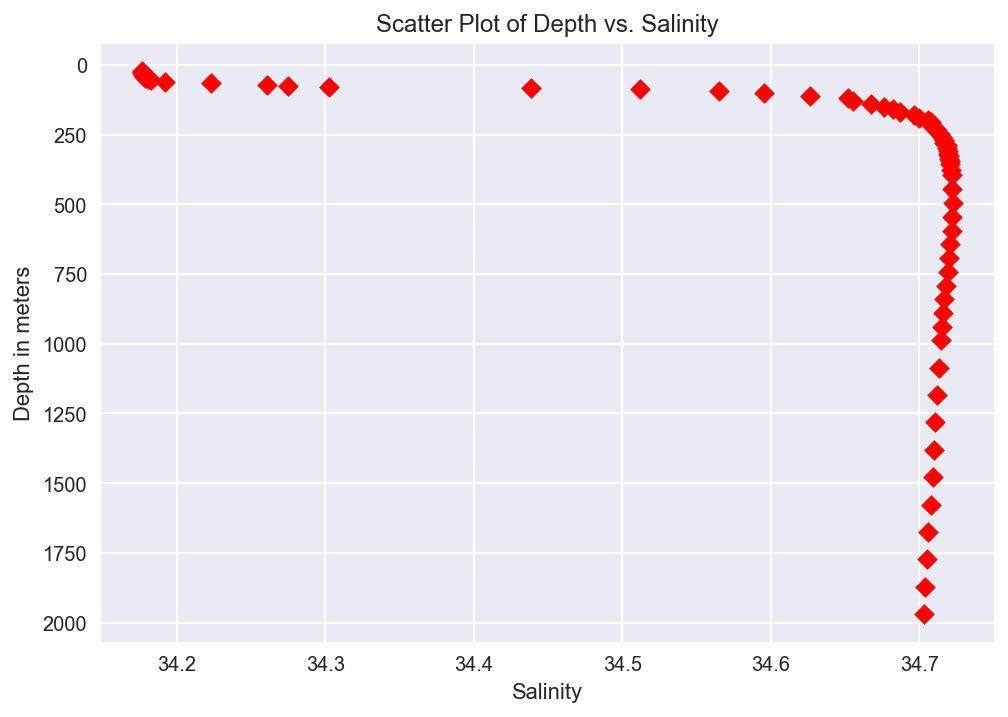

In [58]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
plt.scatter(DF.Salinity, DF.Depth, c='r',marker='D')
plt.xlabel("Salinity")
plt.ylabel('Depth in meters')
plt.title('Scatter Plot of Depth vs. Salinity')
plt.gca().invert_yaxis()
plt.show()

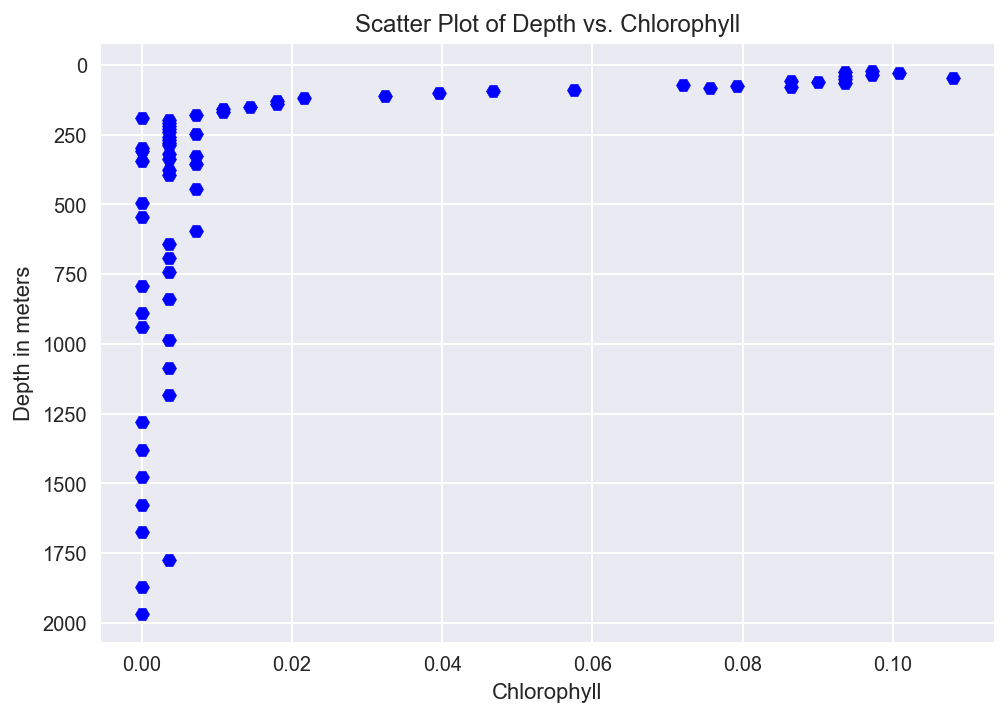

In [59]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
plt.scatter(DF.Chlorophyll, DF.Depth, c='b',marker='H')
plt.xlabel("Chlorophyll")
plt.ylabel('Depth in meters')
plt.title('Scatter Plot of Depth vs. Chlorophyll')
plt.gca().invert_yaxis()
plt.show()

There is more oxygen at the surface because of the atmospheric ocean interaction. Temperature of the water impacts the solubility of the water. (Ideal Gas Law $PV=nRT$). Dead zones - anoxic zones (Areas of sea water, fresh water, or groundwater that are depleted of dissolved oxygen) are deep in the water column where you wouldn't necessarily have enough light to let phytoplankton grow. Compare the graph below to the oxygen profiles in the tropical oceans. What is not seen in this particular plot is due to the range of temperatures being small (a couple degrees) when compared to the range of temperatures in the tropical ocean (large temperature range). There, the surface starts with warm water then as we go deeper, it becomes colder to similar temperatures in the Southern Ocean. Eutrophication, distrophication or hypertrophication, is when a body of water becomes overly enriched with minerals and nutrients which induce excessive growth of algae. This process may result in oxygen depletion of the water body.  Oligotropic zones - relatively low in plant nutrients and abundant $O_2$. A dead zone may be the outcome of a bloom because there is too much oxygen.

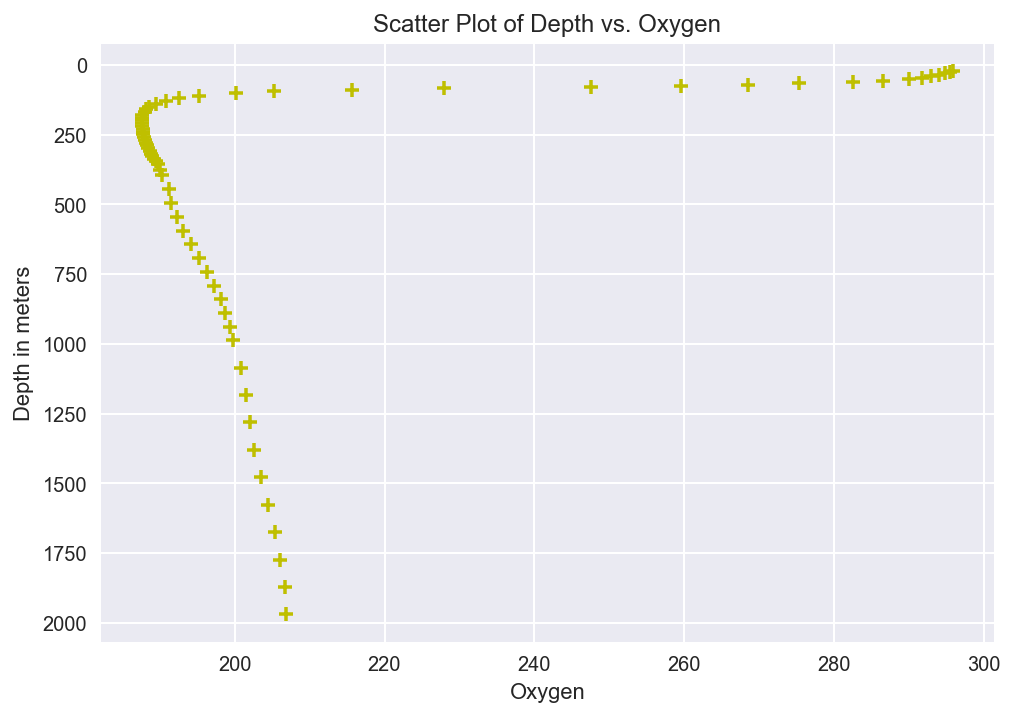

In [56]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
plt.scatter(DF.Oxygen, DF.Depth, c='y',marker='+')
plt.xlabel("Oxygen")
plt.ylabel('Depth in meters')
plt.title('Scatter Plot of Depth vs. Oxygen')
plt.gca().invert_yaxis()
plt.show()

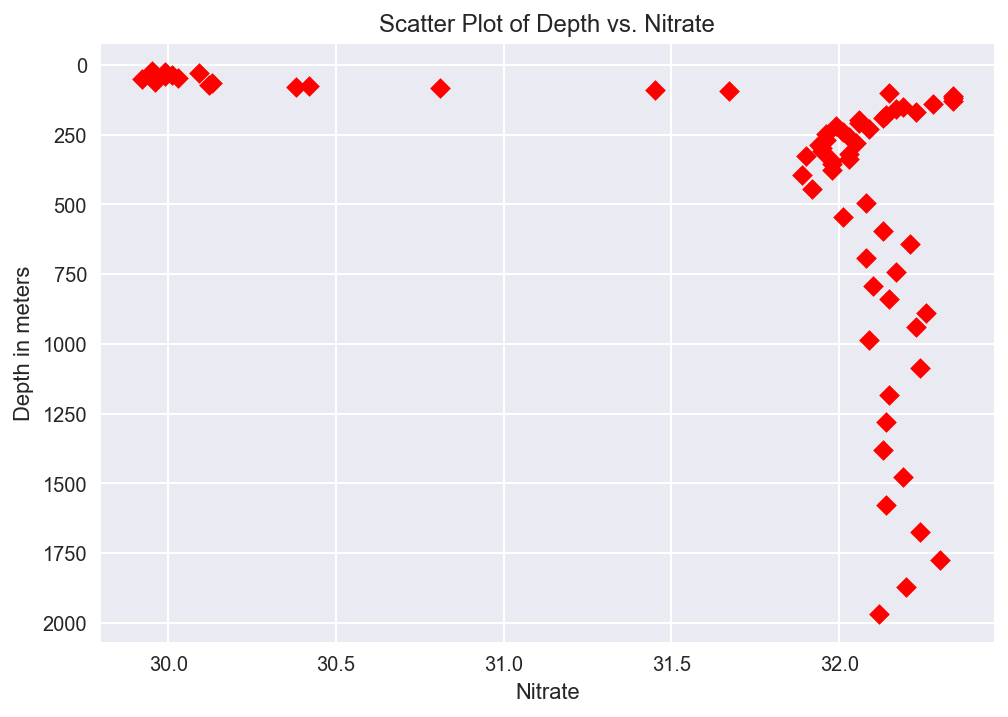

In [54]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
plt.scatter(DF.Nitrate, DF.Depth, c='r',marker='D')
plt.xlabel("Nitrate")
plt.ylabel('Depth in meters')
plt.title('Scatter Plot of Depth vs. Nitrate')
plt.gca().invert_yaxis()
plt.show()

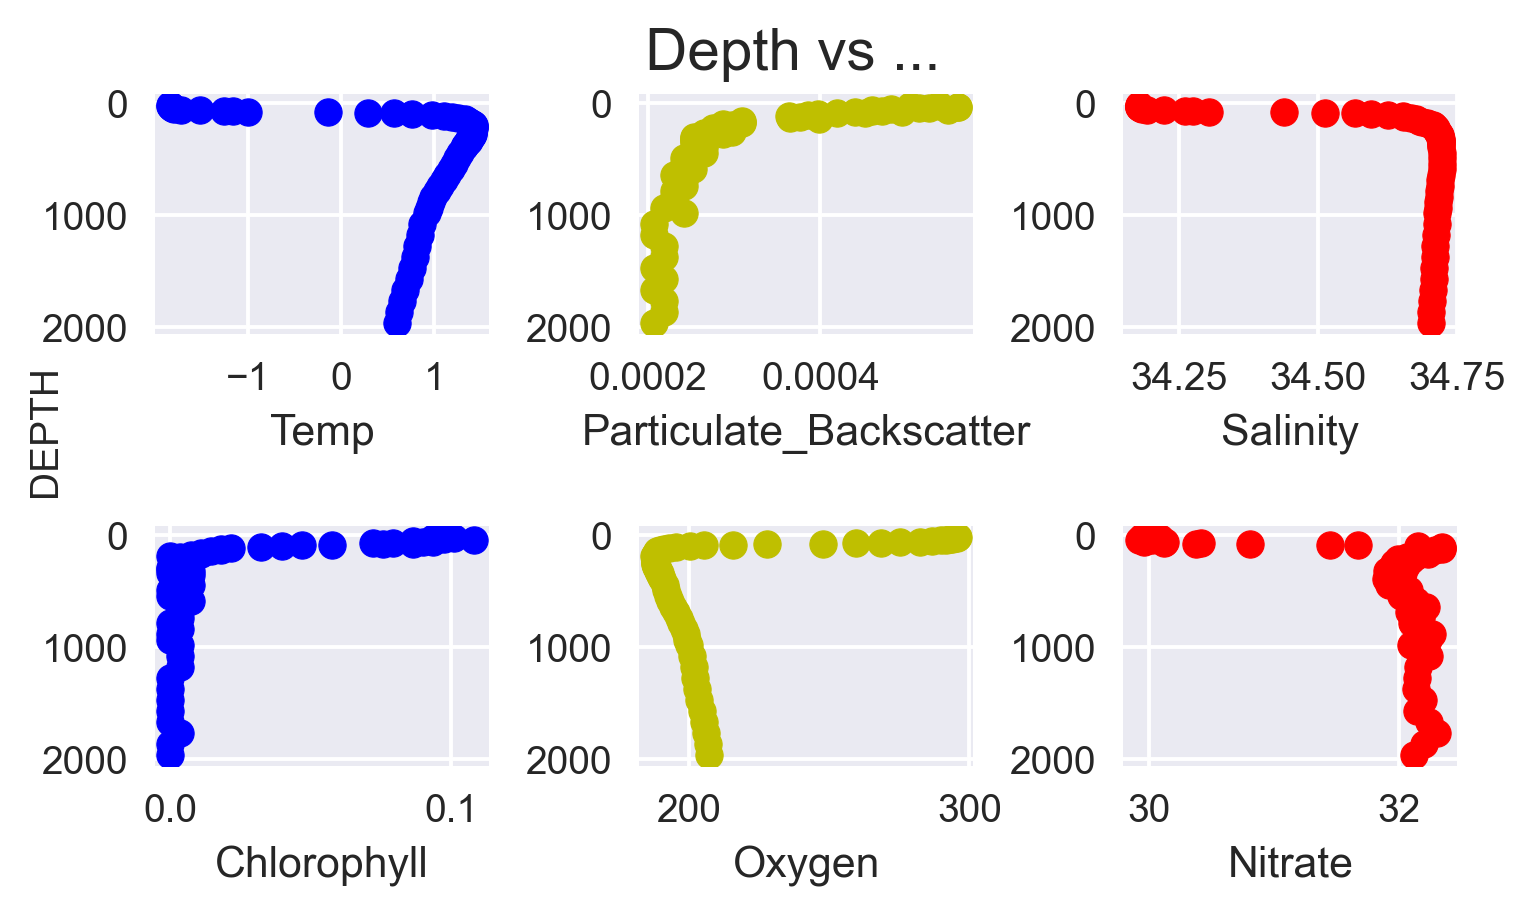

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
from IPython.display import set_matplotlib_formats
DF = pd.read_csv("floats_SO.csv") 
set_matplotlib_formats('retina') 
fig, ax = plt.subplots(2, 3, figsize = (6,3), dpi = 140)

ax[0,0].scatter(DF.Temp, DF.Depth, c='b',marker='o')
ax[0,0].set(xlabel="Temp", ylabel="")
ax[0,0].invert_yaxis()
ax[0,1].scatter(DF.Particulate_Backscatter, DF.Depth, c='y',marker='o')
ax[0,1].set(xlabel="Particulate_Backscatter", ylabel="")
ax[0,1].invert_yaxis()
ax[0,2].scatter(DF.Salinity, DF.Depth, c='r',marker='o')
ax[0,2].set(xlabel="Salinity", ylabel="")
ax[0,2].invert_yaxis()
ax[1,0].scatter(DF.Chlorophyll, DF.Depth, c='b',marker='o')
ax[1,0].set(xlabel="Chlorophyll", ylabel="")
ax[1,0].invert_yaxis()
ax[1,1].scatter(DF.Oxygen, DF.Depth, c='y',marker='o')
ax[1,1].set(xlabel="Oxygen", ylabel="")
ax[1,1].invert_yaxis()
ax[1,2].scatter(DF.Nitrate, DF.Depth, c='r',marker='o')
ax[1,2].set(xlabel="Nitrate", ylabel="")
ax[1,2].invert_yaxis()

fig.suptitle(' Depth vs ...', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.45, 
                    hspace=0.80)
fig.text(0.06, 0.5, 'DEPTH', ha='center', va='center', rotation='vertical')
plt.show()



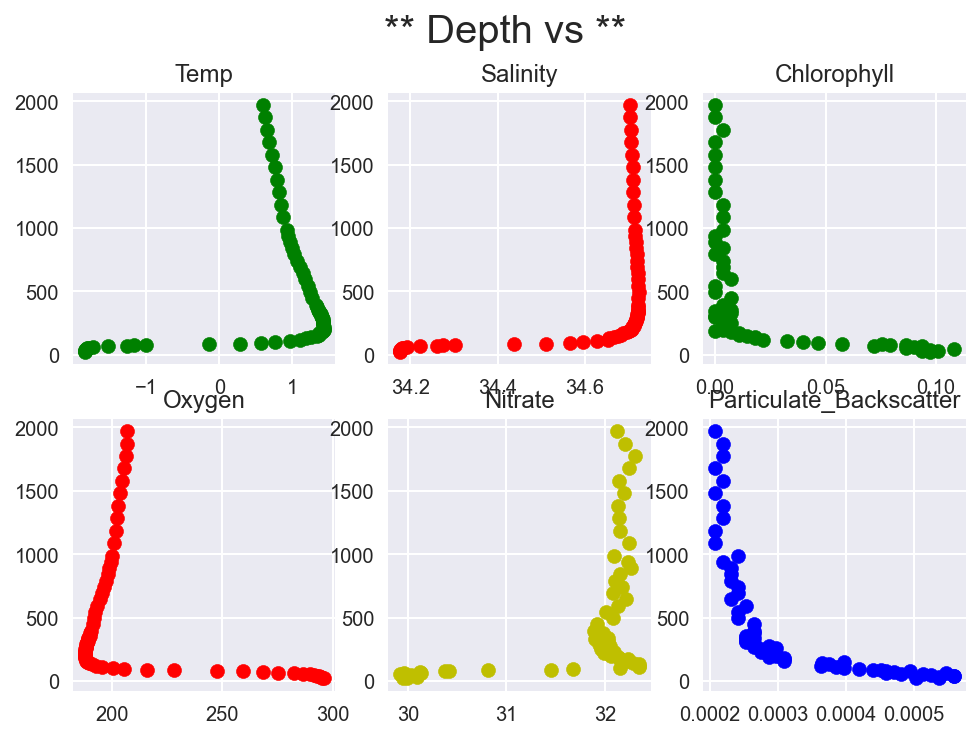

In [62]:
import matplotlib.pyplot as plt
DF = pd.read_csv("floats_SO.csv") 
fig, ax = plt.subplots(2, 3)
fig.suptitle('** Depth vs **', fontsize=20)
plt.style.use('seaborn')
  
labels = ['Temp', 'Salinity', 'Chlorophyll', 'Oxygen', 'Nitrate', 'Particulate_Backscatter']
  
ax[0, 0].scatter(DF.Temp, DF.Depth, c='g',marker='o')
ax[0, 0].set_title('Temp')
  
ax[0, 1].scatter(DF.Salinity, DF.Depth, c='r',marker='o')
ax[0, 1].set_title('Salinity')

ax[0, 2].scatter(DF.Chlorophyll, DF.Depth, c='g',marker='o')
ax[0, 2].set_title('Chlorophyll')
  
ax[1, 0].scatter(DF.Oxygen, DF.Depth, c='r',marker='o')
ax[1, 0].set_title('Oxygen')

ax[1, 1].scatter(DF.Nitrate, DF.Depth, c='y',marker='o')
ax[1, 1].set_title('Nitrate')

ax[1, 2].scatter(DF.Particulate_Backscatter, DF.Depth, c='b',marker='o')
ax[1, 2].set_title('Particulate_Backscatter')
plt.show()

## ARGO, CALIOP, MODIS data
__Goal:__ matchup data across Argo, CALIOP, and MODIS from the global dataset. The matchup data are described in the Bisson et al 2021. This file is not a subset of the global data just based on the Southern Ocean. Need to practice retrieving data from the global set and doing that with Python code. Note: Argo $b_b_p$ is at 700 nm, CALIOP $b_b_p$  is at 532 nm, and MODIS $b_b_p$ is at 531 nm. Accompaning this data is a csv.file of MODIS $Rrs$ (remote sensing reflectance) values. In order to compare these three sensors, the ARGO $b_b_p$ data, at 700 nm, needs to be converted to Argo bbp at 532 nm. Several ways to compute this conversion, using the example in Lee et al., 2002 (equation 7 and table 2). Getting ARGO at 532 nm can be done in one line of code). Using this conversion is basically applying a power law approximation of $b_b_p$ so values can be converted to any wavelength, from any wavelength. The equation needs the $Rrs$ (Remote sensing reflectance from MODIS) values at wavelengths (wl) of 440 and 555 nm. Using the 443 nm one as '440 nm' in the attached csv.file. <br>

__OPTICS__: This data set has low cardinality and represents the "best case scenario" or "coincident matches in time and space" where there is MODIS data matched up with CALIOP data and ARGO data (following (Bisson et al 2020)). Take a direct matchup with MODIS data (passive ocean color sensor) is at an angle, looking at the light reflected from the sun off the ocean surface. For example, we have an ARGO float contained in a 1 km pixel. CALIOP data is contained in a 90 meter diameter, collecting photons generated from CALIOP (active sensor) and 'looking' straight down to the ocean surface. MODIS products are spatially grided. MODIS data was downloaded in a 5x5 pixel box around or containing that 1 km pixel spot. CALIOP and ARGO are single, discreet points in space (lidar collects lines of data compared to MODIS which collects wider imagery, or swaths. <br>

The CALIOP data is separated by up to 15 km apart from the MODIS and ARGO matchup. All data exist on same day. Very few Southern Ocean data points in the global data set given. Backscattering, like many processes, is spectrally dependent. There must be some accounting for the different wavelenghts. <br>

Inherent in this equation is that backscattering spectral slope behaves like a powerlaw over a wavelength. For example, ARGO data from row 1 is 0.000913301. Multiply this with (700/532)^(-1) gives us 0.00069388.
 It is monotonic. Backscattering is assumed to have a constant spectral slope. With a backscattering slope around -2, we are going to have a more dramatic curve with respect to wavelength. Data set: have more data than I need. What is the best way in Python to cut my data frame to the Southern Ocean? Focus on: looking at regional averages, similarities and differences, monthly averages over bigger regions. Dependent on time. Begin with Step 5 of (Lee et al. 2002)<img src='Lee et al..png' width="700" height="400"><br> 
 
Reflectance data. Spectral reflectance - a measure of how muhc energy (as a percent) a surface reflects at a specific wavelength. Subsurface values $r_rs vs. R_rs st^-1$. There is an important distinction between the two. Reflectance property has an angular dependence. As we go through an interface that separates two different densities, air and water, we get refraction. The below and above reflectance are related by Step 0 above. 

NaN means not a number. Helps to preserve the size of the data frame. 

Converting ARGO data at 700 nm to 532 nm. Applying Step 5 of Lee et al. 2002. Applied to column ARGO to the power of $Y = 1$, to produce ARGO2. And applied to column ARGO to the power of $Y = Step 4 ~ 2$, to produce ARGO3. See how those results differ. 

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
import math


DF = pd.read_csv("Rrs_modis.csv")
df = pd.read_csv("sensor_comp_global24.csv")

ARGO2 = df.ARGO.multiply((700/532)**(1))
df.insert(1, "ARGO2", ARGO2)

DF.insert(6, "Result", DF['WL443']/DF['WL555'])
Result1 = np.exp(DF.Result.multiply(-0.9))
DF.insert(7, "Result1", Result1)

def Step4(x):
    return (2.2*(1-1.2*(x)))
            
Function = DF.Result1.transform(Step4)
DF.insert(8, "Function_Result", Function)

ARGO3 = df.ARGO.multiply((700/532)**DF.Function_Result)
df.insert(2, "ARGO3", ARGO3)
print(df)
print(DF)


         ARGO     ARGO2     ARGO3     MODIS    CALIOP       LAT        LON  \
0    0.000913  0.001202  0.001501  0.000819  0.001730  64.96500   -3.27800   
1    0.000913  0.001202  0.001474  0.000599  0.001730  64.96500   -3.27800   
2    0.001149  0.001512  0.002003  0.001406  0.001463 -41.97293    2.66241   
3    0.001796  0.002364  0.003113  0.002445  0.001324 -43.38602   49.31100   
4    0.001550  0.002039  0.002724  0.001818  0.000927 -48.84700 -118.59600   
..        ...       ...       ...       ...       ...       ...        ...   
256  0.000810  0.001066  0.001466  0.001026  0.001038  39.19498   10.59784   
257  0.000843  0.001109  0.001527  0.000994  0.001025  37.92505    6.48214   
258  0.000854  0.001123  0.001547  0.001000  0.001033  37.92918    6.48248   
259  0.000809  0.001065  0.001466  0.000999  0.001044  37.98532    6.47905   
260  0.000639  0.000840  0.001159  0.000906  0.000935  39.03913   10.62109   

       YR  MONTH  DAY  
0    2015      4   28  
1    2015      

_PLOT:_ The global data scatter plot of MODIS $b_b_p$ vs CALIOP $b_b_p$. Highlight the matchups in the Southern Ocean (~ 40 degrees South or less).

         ARGO     MODIS    CALIOP       LAT        LON    YR  MONTH  DAY
2    0.001149  0.001406  0.001463 -41.97293    2.66241  2015      9   26
3    0.001796  0.002445  0.001324 -43.38602   49.31100  2016      1   14
4    0.001550  0.001818  0.000927 -48.84700 -118.59600  2016      1   16
7    0.003264  0.002942  0.001802 -47.74600   72.37100  2011     12   16
15   0.001092  0.001390  0.001364 -43.56017   25.44932  2014      9   23
16   0.000827  0.002105  0.001211 -54.81584  -53.47967  2015      5   22
17   0.001214  0.001782  0.001338 -52.11902   83.70936  2015     11   21
18   0.001214  0.001079  0.001338 -52.11902   83.70936  2015     11   21
19   0.008670  0.009071  0.006547 -50.52254  -56.07344  2015     12    5
20   0.001214  0.001782  0.001338 -52.11902   83.70936  2015     11   21
21   0.001214  0.001079  0.001338 -52.11902   83.70936  2015     11   21
36   0.000845  0.001036  0.001305 -41.10819  -25.44353  2015      1   11
109  0.002041  0.002244  0.002380 -41.94767   58.02

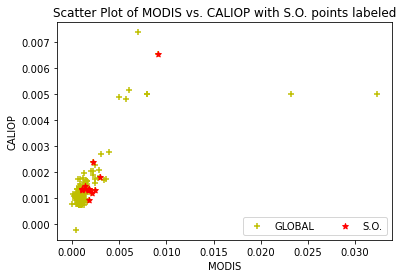

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd

from IPython.display import set_matplotlib_formats
DF1 = pd.read_csv("sensor_comp_global24.csv") 
DF2 = pd.read_csv("Rrs_modis.csv") 
plt.scatter(DF1.MODIS, DF1.CALIOP, c='y',marker='+')
plt.xlabel("MODIS")
plt.ylabel('CALIOP')
plt.title('Scatter Plot of MODIS vs. CALIOP with S.O. points labeled')

Southern_Ocean = DF1[DF1['LAT'] <= -40]

print(Southern_Ocean)

plt.scatter(Southern_Ocean.MODIS, Southern_Ocean.CALIOP, c='r',marker='*')
plt.legend(["GLOBAL" , "S.O."], ncol = 2 , loc = "lower right")
plt.show()

plt.scatter()

## Performance Metrics
Benefits and downsides of using different statistical methods for comparing data. For example, the mean square difference versus the correlation coefficient. What is the best way to compare and present the data? What biases could arise? How do I honestly convey the relationship between what I am comparing? She did bias and root mean square difference. 